In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


# Ensemble learning
- hard vote: use the majority result
- Soft vote: use the highest possibility value

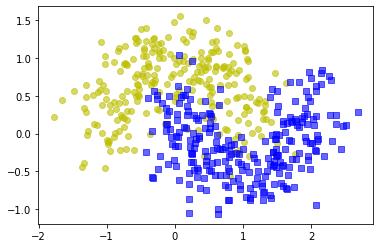

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
x, y = make_moons(n_samples = 500, noise =0.3, random_state=40)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)
plt.plot(x[:,0][y==0], x[:,1][y==0], 'yo', alpha=0.6)
plt.plot(x[:,0][y==1], x[:,1][y==1], 'bs', alpha=0.6)
plt.show()


# Voting strategy
## - Hard voting

In [5]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svc_clf = SVC(random_state=42)

voting_clf = VotingClassifier(estimators=[('lc',log_clf),('rd',rnd_clf),('svc_clf',svc_clf)],voting='hard')


In [6]:
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lc', LogisticRegression(random_state=42)),
                             ('rd', RandomForestClassifier(random_state=42)),
                             ('svc_clf', SVC(random_state=42))])

In [7]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svc_clf, voting_clf):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.83
RandomForestClassifier 0.91
SVC 0.93
VotingClassifier 0.92


## - Soft voting

  Each classfier need to get the probability

In [8]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svc_clf = SVC(probability=True,random_state=42)
voting_clf = VotingClassifier(estimators=[('lc',log_clf),('rd',rnd_clf),('svc_clf',svc_clf)],voting='soft')

In [9]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svc_clf, voting_clf):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.83
RandomForestClassifier 0.91
SVC 0.93
VotingClassifier 0.9


# Bagging

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
          n_estimators=500,
          max_samples=50,
          bootstrap=True,
          n_jobs = -1,
          random_state =42)
bag_clf.fit(x_train,y_train)
y_pred = bag_clf.predict(x_test)
accuracy_score(y_test, y_pred)


0.91

In [11]:
dec_clf = DecisionTreeClassifier(random_state=42)
dec_clf.fit(x_train,y_train)                                
y_pred_tree = dec_clf.predict(x_test)
accuracy_score(y_test, y_pred_tree)

0.84

# decision surface

- with 

In [12]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, x, y, axes=[-1.5, 2.5, -1,1.5], alpha=0.5, contour=True):
  x1s = np.linspace(axes[0], axes[1], 100)
  x2s = np.linspace(axes[2], axes[3], 100)
  x1, x2 = np.meshgrid(x1s,x2s)
  x_new = np.c_[x1.ravel(),x2.ravel()]
  y_pred = clf.predict(x_new).reshape(x1.shape)
  if contour:
    custom_cmap2 = ListedColormap(['#800080','#0000FF','#00FFFF'])
    plt.contour(x1,x2,y_pred,cmap = custom_cmap2, alpha=0.8)
  plt.plot(x[:,0][y==0], x[:,1][y==0], 'yo', alpha=0.6)
  plt.plot(x[:,0][y==1], x[:,1][y==1], 'bs', alpha=0.6)
  plt.axis(axes)
  plt.xlabel('x1')
  plt.xlabel('x2') 



Text(0.5, 1.0, 'decision tree')

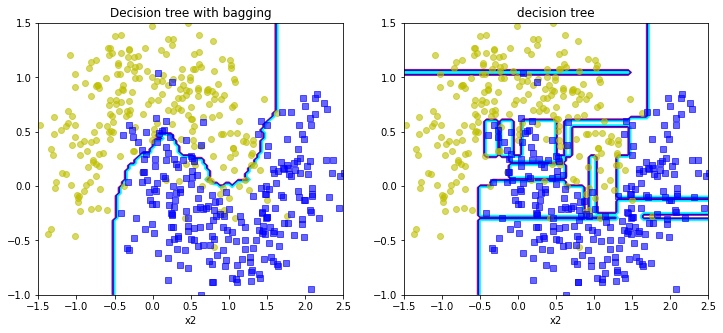

In [13]:
plt.figure(figsize = (12,5))
plt.subplot(121)
plot_decision_boundary(bag_clf,x,y)
plt.title('Decision tree with bagging')
plt.subplot(122)
plot_decision_boundary(dec_clf,x=x,y=y)
plt.title('decision tree')


# Out of Bag strategy

In [14]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
          n_estimators=500,
          max_samples=50,
          bootstrap=True,
          n_jobs = -1,
          random_state =42,
          oob_score=True)
bag_clf.fit(x_train, y_train)

bag_clf.oob_score_

0.885

In [15]:
y_pred = bag_clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.91

In [16]:
bag_clf.oob_decision_function_

array([[0.99047619, 0.00952381],
       [0.92396313, 0.07603687],
       [0.07174888, 0.92825112],
       [0.03153153, 0.96846847],
       [0.72335601, 0.27664399],
       [0.82522124, 0.17477876],
       [0.27842227, 0.72157773],
       [0.71527778, 0.28472222],
       [1.        , 0.        ],
       [0.05790646, 0.94209354],
       [0.07760532, 0.92239468],
       [0.37389381, 0.62610619],
       [0.99770642, 0.00229358],
       [0.93891403, 0.06108597],
       [0.97315436, 0.02684564],
       [0.12443439, 0.87556561],
       [0.22045455, 0.77954545],
       [0.67920354, 0.32079646],
       [0.95216401, 0.04783599],
       [0.09213483, 0.90786517],
       [0.97098214, 0.02901786],
       [0.96162528, 0.03837472],
       [0.94736842, 0.05263158],
       [0.11235955, 0.88764045],
       [0.89351852, 0.10648148],
       [0.01830664, 0.98169336],
       [0.30296128, 0.69703872],
       [0.92857143, 0.07142857],
       [0.97004608, 0.02995392],
       [0.89709172, 0.10290828],
       [0.

# random forest 

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)


RandomForestClassifier()

# Feature importance 

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris['feature_names'], rf_clf.feature_importances_):
  print(name, score)

sepal length (cm) 0.09928824541048532
sepal width (cm) 0.022673335645658682
petal length (cm) 0.4323548726758574
petal width (cm) 0.4456835462679985


## Mnist dataset feature importance

In [19]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [20]:
rf_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf_clf.fit(X,y)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [ ]:
rf_clf.feature_importances_.shape

In [22]:
def plot_digit(data):
  image = data.reshape(28,28)
  plt.imshow(image, cmap=matplotlib.cm.hot)
  plt.axis('off')

[Text(1, 0, 'not importance'), Text(1, 0, 'very important')]

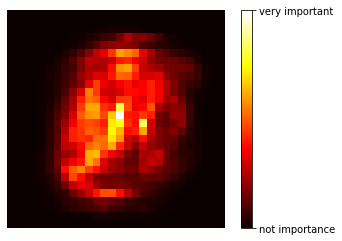

In [23]:
plot_digit(rf_clf.feature_importances_)
char=plt.colorbar(ticks=[rf_clf.feature_importances_.min(),rf_clf.feature_importances_.max()])
char.ax.set_yticklabels(["not importance", 'very important'])

# Boosting 
## AdaBoost

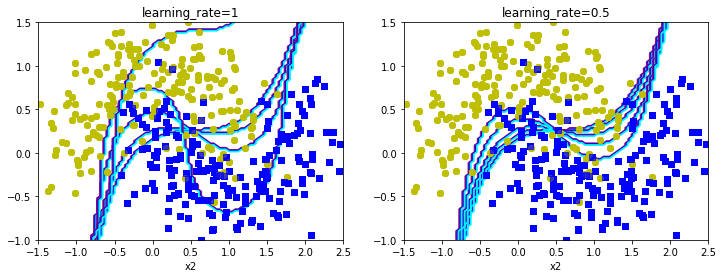

In [24]:
m =len(x_train)
from sklearn.svm import SVC
plt.figure(figsize=(12,4))
for subplot, learning_rate in ((121,1), (122,0.5)):
  sample_weights = np.ones(m)
  plt.subplot(subplot)
  for i in range(5):
    svm_clf = SVC(kernel='rbf', C=0.05, random_state=42)
    svm_clf.fit(x_train, y_train, sample_weight = sample_weights)
    y_pred = svm_clf.predict(x_train)
    sample_weights[y_pred != y_train] *=(1+learning_rate)
    plot_decision_boundary(svm_clf,x_train,y_train)
    plt.title("learning_rate={}".format(learning_rate))
plt.show()



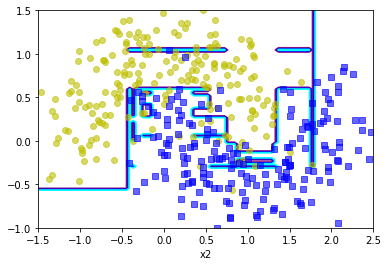

In [25]:
from sklearn.ensemble import AdaBoostClassifier
adb_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                             n_estimators=200, 
                             learning_rate=0.5,
                             random_state=42)
adb_clf.fit(x_train, y_train)
plot_decision_boundary(adb_clf,x_train, y_train)

# Gradient boosting

In [26]:
np.random.seed(45)
x = np.random.rand(100,1)-0.5
y = 3*x[:,0]**2 + 0.05*np.random.randn(100)

In [27]:
from sklearn.tree import DecisionTreeRegressor
dec_reg = DecisionTreeRegressor()

In [28]:
dec_reg.fit(x,y)


DecisionTreeRegressor()

In [29]:
y2 = y-dec_reg.predict(x)
dec_reg2 =DecisionTreeRegressor()
dec_reg2.fit(x,y2)


DecisionTreeRegressor()

In [30]:
y3 = y2-dec_reg2.predict(x)
dec_reg3 =DecisionTreeRegressor()
dec_reg3.fit(x,y3)

DecisionTreeRegressor()

In [31]:
x_new = np.array([[0.8]])
y_pred = sum(tree.predict(x_new) for tree in (dec_reg,dec_reg2,dec_reg3))
y_pred

array([0.69900251])

 - gradient boosting package: XGboost, lightGBM

In [32]:

from sklearn.ensemble import GradientBoostingRegressor
gbdt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbdt.fit(x, y)


GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [33]:

from sklearn.ensemble import GradientBoostingRegressor
gbdt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=0.1, random_state=42)
gbdt_slow.fit(x, y)


GradientBoostingRegressor(max_depth=2, n_estimators=3, random_state=42)

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
gbdt_3 = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbdt_3.fit(x, y)

GradientBoostingRegressor(max_depth=2, n_estimators=200, random_state=42)

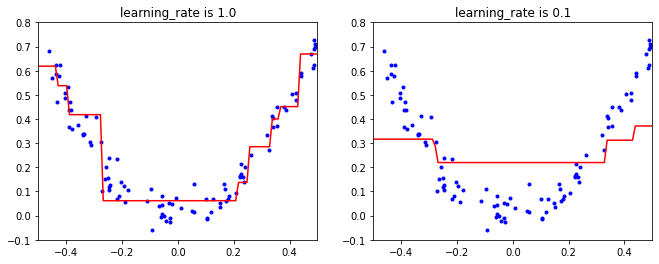

In [35]:
x1 = np.linspace([-0.5], [0.5], 100)
plt.figure(figsize = (11,4))
plt.subplot(121)
plt.plot(x, y ,'b.')
plt.plot(x1,gbdt.predict(x1), 'r-', label='learning_rate 1')
plt.axis([-0.5,0.5,-0.1,0.8])
plt.title("learning_rate is {}".format(gbdt.learning_rate))
plt.subplot(122)
plt.plot(x, y ,'b.')
plt.plot(x1,gbdt_slow.predict(x1), 'r-', label='learning_rate 0.1')
plt.axis([-0.5,0.5,-0.1, 0.8])
plt.title("learning_rate is {}".format(gbdt_slow.learning_rate))
plt.show()

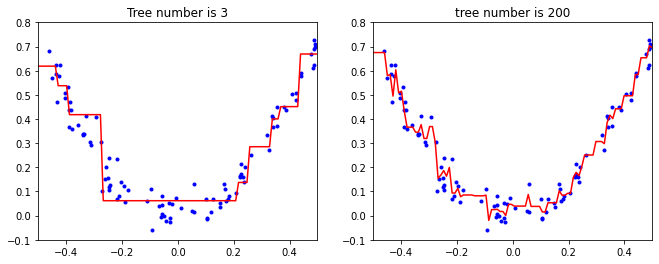

In [36]:
x1 = np.linspace([-0.5], [0.5], 100)
plt.figure(figsize = (11,4))
plt.subplot(121)
plt.plot(x, y ,'b.')
plt.plot(x1,gbdt.predict(x1), 'r-', label='learning_rate 1')
plt.axis([-0.5,0.5,-0.1,0.8])
plt.title("Tree number is {}".format(gbdt.n_estimators_))
plt.subplot(122)
plt.plot(x, y ,'b.')
plt.plot(x1,gbdt_3.predict(x1), 'r-', label='learning_rate 0.1')
plt.axis([-0.5,0.5,-0.1, 0.8])
plt.title("tree number is {}".format(gbdt_3.n_estimators_))
plt.show()

# Early stopping strategy

In [37]:
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
grbt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
grbt.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)

In [38]:
errors = [mean_squared_error(y_test, y_pred) for y_pred in grbt.staged_predict(x_test)]
best_n_estimators = np.argmin(errors)
grbt_best =  GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators , random_state=42)
grbt_best.fit(x_train, y_train)


GradientBoostingRegressor(max_depth=2, n_estimators=43, random_state=42)

In [39]:
min_error = np.min(errors)
min_error

0.004871068744919322

Text(0.5, 1.0, 'best method with estimator 43')

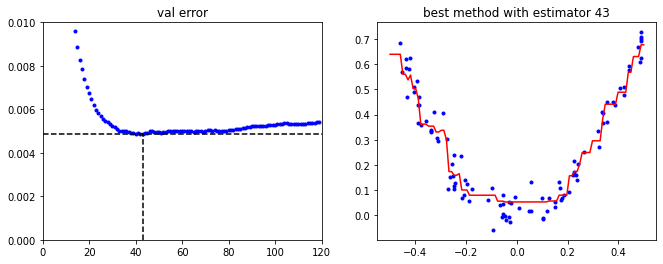

In [40]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(errors, 'b.')
plt.plot([best_n_estimators, best_n_estimators], [0,min_error], 'k--')
plt.plot([0,120], [min_error, min_error], 'k--')
plt.title('val error')
plt.axis([0,120,0,0.01])
plt.subplot(122)
plt.plot(x,y,'b.')
x1 = np.linspace([-0.5], [0.5], 100)
plt.plot(x1, grbt_best.predict(x1), 'r-')
plt.title("best method with estimator {}".format(grbt_best.n_estimators_))

- Early stopping strategy

In [41]:
grbt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)  #use warm start method
min_val_error = float('inf')
error_going_up = 0
for n_estimators in range(1,120):
  grbt.n_estimators = n_estimators
  grbt.fit(x_train, y_train)
  y_pred = grbt.predict(x_test)
  val_error = mean_squared_error(y_test, y_pred)
  if val_error<min_val_error:
    min_val_error = val_error
    error_going_up = 0
  else:
    error_going_up += 1
    if error_going_up == 5:
      break
      




In [42]:
print(grbt.n_estimators_)

49


# Stacking

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
mnist = fetch_openml("mnist_784", version=1,as_frame=True)


In [52]:
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, train_size=0.8, random_state=42)


In [56]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
rdm_clf = RandomForestClassifier(random_state=42)
ext_clf = ExtraTreesClassifier(random_state=42)
svc_clf = LinearSVC(max_iter=1500,random_state=42)
mlp_clf = MLPClassifier(random_state=42)
estimators = [rdm_clf, ext_clf, svc_clf, mlp_clf]

In [58]:
for estimator in estimators:
  print("training the {}".format(estimator))
  estimator.fit(x_train, y_train)

training the RandomForestClassifier(random_state=42)
training the ExtraTreesClassifier(random_state=42)
training the LinearSVC(random_state=42)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


training the MLPClassifier(random_state=42)


For stacking method, use the first stage result as the input for the second stage

In [62]:
type(enumerate(estimators))


enumerate

In [67]:
x_test_pred = np.empty((len(x_test), len(estimators)), dtype=np.float32)
for index, estimator in enumerate(estimators):
  x_test_pred[:,index] = estimator.predict(x_test)


In [69]:
rnd_forest_blender = RandomForestClassifier(n_estimators=200, random_state=42, oob_score=True)
rnd_forest_blender.fit(x_test_pred, y_test)
rnd_forest_blender.oob_score_

0.9659285714285715